In [1]:
import sys
sys.path.append('../')
import torch.optim as optim
from datasetval import *
from model import *
import torch.nn.init as init
from sklearn.preprocessing import MinMaxScaler
from torch.utils.tensorboard import SummaryWriter

Train_epoch:0    MAE:102.27690048373158  Pure MAE:102.27690048373158
Train_epoch:10    MAE:5.228855125772977  Pure MAE:5.228855125772977
val_epoch:10    MAE_val:5.53544855476322
Test_epoch:10    MAE_test:7.168296089539161


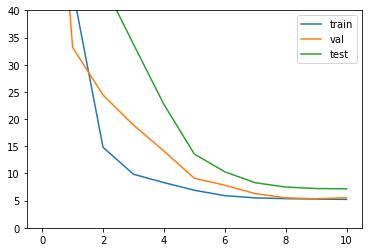

Train_epoch:20    MAE:5.087485953892322  Pure MAE:5.087485953892322
val_epoch:20    MAE_val:5.182739786635664
Test_epoch:20    MAE_test:6.291482483729338


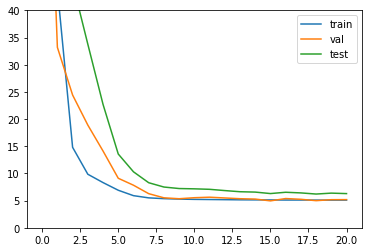

Train_epoch:30    MAE:5.033464596373486  Pure MAE:5.033464596373486
val_epoch:30    MAE_val:4.992679821817498
Test_epoch:30    MAE_test:6.059987355501224


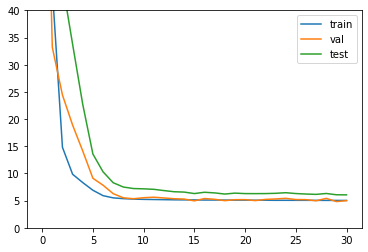

Train_epoch:40    MAE:4.996059052570288  Pure MAE:4.996059052570288
val_epoch:40    MAE_val:5.125053246218459
Test_epoch:40    MAE_test:6.109315870664059


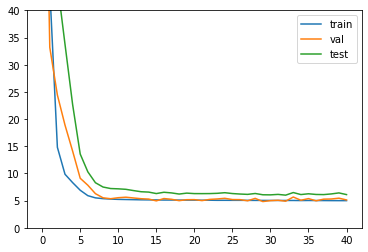

Train_epoch:50    MAE:4.9629351476059425  Pure MAE:4.9629351476059425
val_epoch:50    MAE_val:5.141150064038155
Test_epoch:50    MAE_test:6.155168811480205


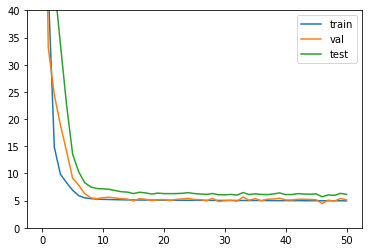

Train_epoch:60    MAE:4.937273197892727  Pure MAE:4.937273197892727
val_epoch:60    MAE_val:5.234739757121954
Test_epoch:60    MAE_test:6.3005945682525635


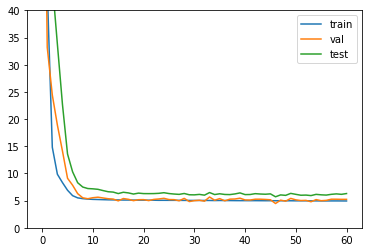

Train_epoch:70    MAE:4.911408155367476  Pure MAE:4.911408155367476
val_epoch:70    MAE_val:4.862236580454317
Test_epoch:70    MAE_test:5.892828204692939


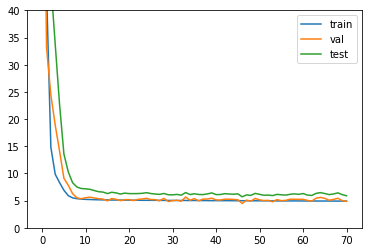

Train_epoch:80    MAE:4.886888871124952  Pure MAE:4.886888871124952
val_epoch:80    MAE_val:4.910368037403078
Test_epoch:80    MAE_test:6.031310541507525


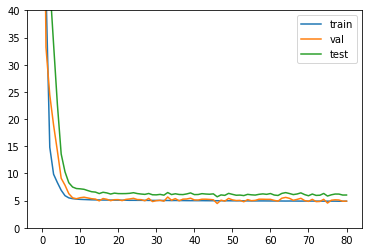

Train_epoch:90    MAE:4.861222099141045  Pure MAE:4.861222099141045
val_epoch:90    MAE_val:4.92203180234235
Test_epoch:90    MAE_test:6.08963634723272


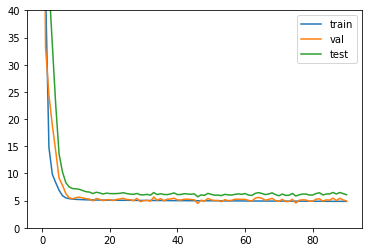

Train_epoch:100    MAE:4.833417078628074  Pure MAE:4.833417078628074
val_epoch:100    MAE_val:5.0395273749989675
Test_epoch:100    MAE_test:6.335757180666312


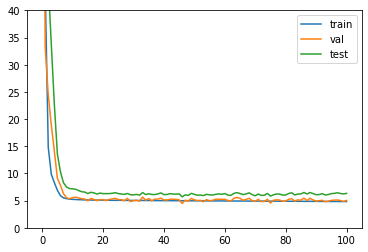

Train_epoch:110    MAE:4.780763077395997  Pure MAE:4.780763077395997
val_epoch:110    MAE_val:5.055335778042786
Test_epoch:110    MAE_test:6.655872441255129


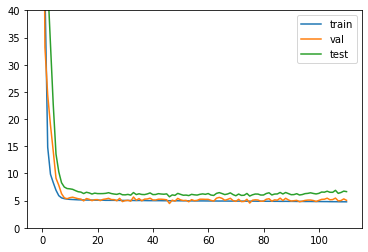

Train_epoch:120    MAE:4.639953491401284  Pure MAE:4.639953491401284
val_epoch:120    MAE_val:5.0766282081604
Test_epoch:120    MAE_test:8.031608026761274


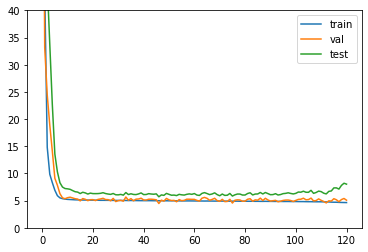

Train_epoch:130    MAE:4.4100315522273545  Pure MAE:4.4100315522273545
val_epoch:130    MAE_val:7.106129811222392
Test_epoch:130    MAE_test:15.545843145786188


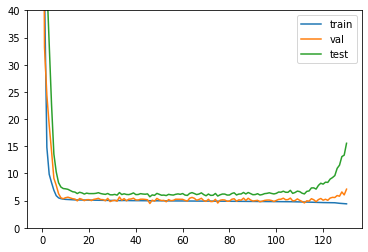

Train_epoch:140    MAE:3.7947533096655324  Pure MAE:3.7947533096655324
val_epoch:140    MAE_val:8.826709116311898
Test_epoch:140    MAE_test:26.807015333420193


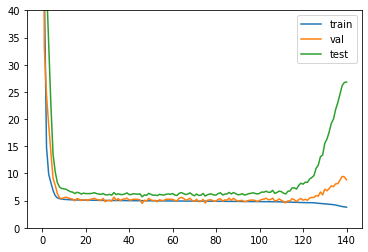

Train_epoch:150    MAE:3.4078785547656585  Pure MAE:3.4078785547656585
val_epoch:150    MAE_val:8.781804357256208
Test_epoch:150    MAE_test:30.12515859726148


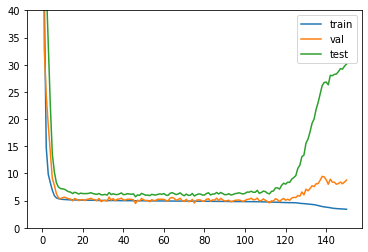

Train_epoch:160    MAE:3.2251945634480648  Pure MAE:3.2251945634480648
val_epoch:160    MAE_val:7.7200484311670285
Test_epoch:160    MAE_test:31.435969120416885


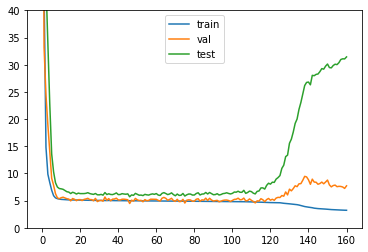

Train_epoch:170    MAE:3.183832061266462  Pure MAE:3.183832061266462
val_epoch:170    MAE_val:7.692782036343911
Test_epoch:170    MAE_test:32.72337433619377


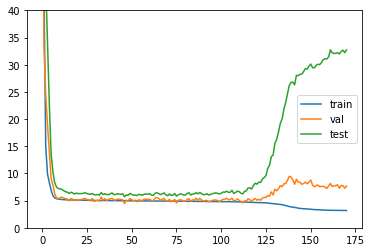

Train_epoch:180    MAE:3.1800406731801703  Pure MAE:3.1800406731801703
val_epoch:180    MAE_val:7.19110611865395
Test_epoch:180    MAE_test:32.42851244486295


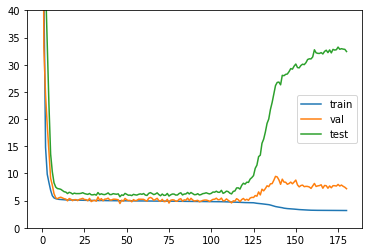

Train_epoch:190    MAE:3.1864265448692617  Pure MAE:3.1864265448692617
val_epoch:190    MAE_val:7.439232836988635
Test_epoch:190    MAE_test:32.66248734180744


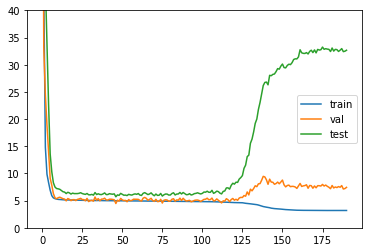

Train_epoch:200    MAE:3.1776632296334943  Pure MAE:3.1776632296334943
val_epoch:200    MAE_val:7.6191836514867335
Test_epoch:200    MAE_test:32.713399355228134


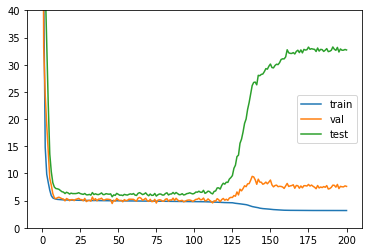

Train_epoch:210    MAE:3.1786662633938603  Pure MAE:3.1786662633938603
val_epoch:210    MAE_val:6.887554312110844
Test_epoch:210    MAE_test:32.237453943643814


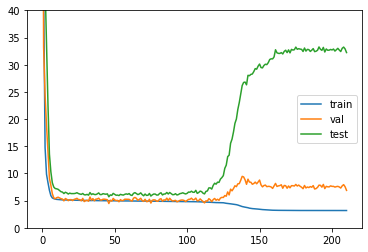

Train_epoch:220    MAE:3.1873783492265066  Pure MAE:3.1873783492265066
val_epoch:220    MAE_val:7.46642113448982
Test_epoch:220    MAE_test:32.66605594830635


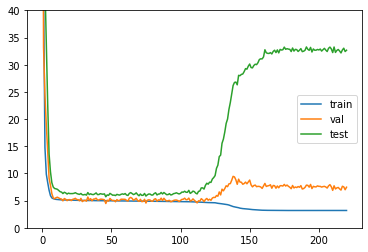

Train_epoch:230    MAE:3.182854432438153  Pure MAE:3.182854432438153
val_epoch:230    MAE_val:7.150718298173489
Test_epoch:230    MAE_test:32.58154752315619


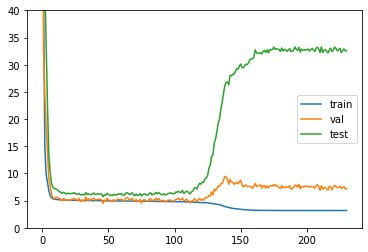

Train_epoch:240    MAE:3.1853123750317605  Pure MAE:3.1853123750317605
val_epoch:240    MAE_val:7.381914443539498
Test_epoch:240    MAE_test:32.732418922277596


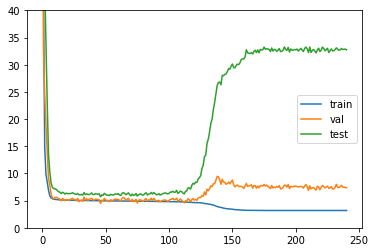

Train_epoch:250    MAE:3.1829378658302447  Pure MAE:3.1829378658302447
val_epoch:250    MAE_val:7.765124464393558
Test_epoch:250    MAE_test:32.789976089428635


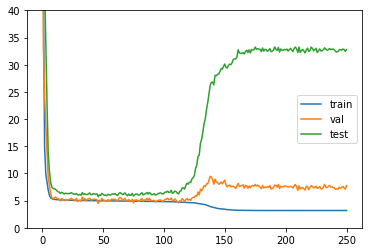

Train_epoch:260    MAE:3.184649127078396  Pure MAE:3.184649127078396
val_epoch:260    MAE_val:7.190463593131618
Test_epoch:260    MAE_test:32.45915474035801


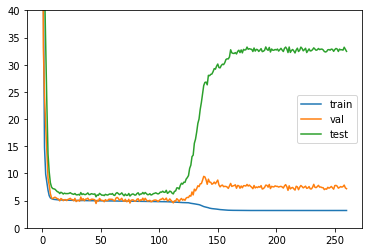

Train_epoch:270    MAE:3.1867970419998324  Pure MAE:3.1867970419998324
val_epoch:270    MAE_val:7.739658524219255
Test_epoch:270    MAE_test:33.107226494031075


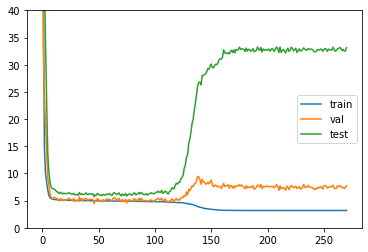

Train_epoch:280    MAE:3.183248004699676  Pure MAE:3.183248004699676
val_epoch:280    MAE_val:7.395229332429126
Test_epoch:280    MAE_test:32.61968825413631


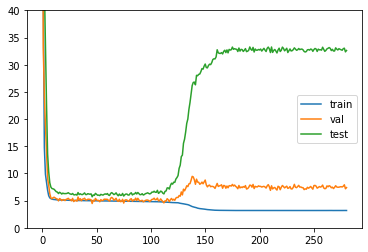

Train_epoch:290    MAE:3.1804106337475435  Pure MAE:3.1804106337475435
val_epoch:290    MAE_val:7.663112443192561
Test_epoch:290    MAE_test:33.05921929921859


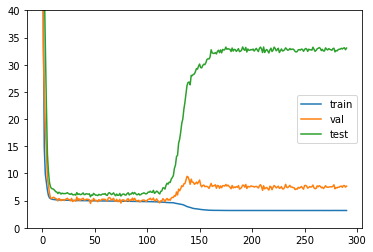

Train_epoch:300    MAE:3.182757882625168  Pure MAE:3.182757882625168
val_epoch:300    MAE_val:7.60592338017055
Test_epoch:300    MAE_test:33.09203191292592


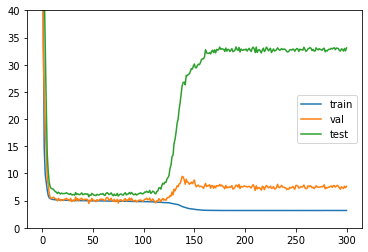

Train_epoch:310    MAE:3.182565348211471  Pure MAE:3.182565348211471
val_epoch:310    MAE_val:7.075785221013808
Test_epoch:310    MAE_test:32.4122764086112


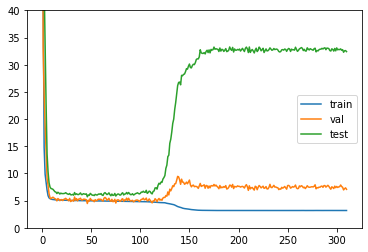

Train_epoch:320    MAE:3.1844055186463955  Pure MAE:3.1844055186463955
val_epoch:320    MAE_val:7.704125734200155
Test_epoch:320    MAE_test:32.92034553258847


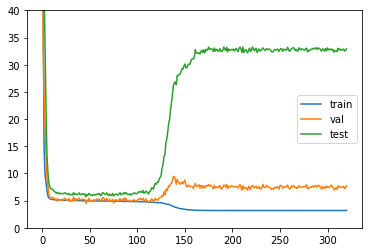

Train_epoch:330    MAE:3.1847365116150463  Pure MAE:3.1847365116150463
val_epoch:330    MAE_val:8.03081620725474
Test_epoch:330    MAE_test:33.12707702930157


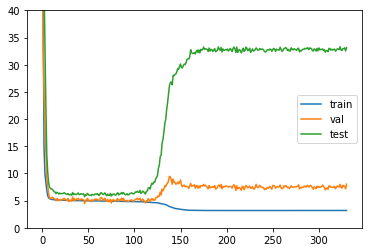

Train_epoch:340    MAE:3.179495338024287  Pure MAE:3.179495338024287
val_epoch:340    MAE_val:7.29110756852573
Test_epoch:340    MAE_test:32.6800140723204


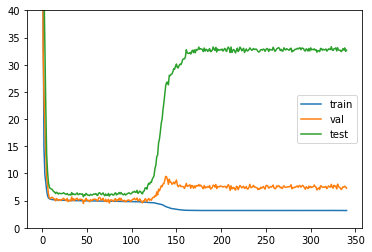

Train_epoch:350    MAE:3.182759345184761  Pure MAE:3.182759345184761
val_epoch:350    MAE_val:7.438563734068906
Test_epoch:350    MAE_test:32.60217150052389


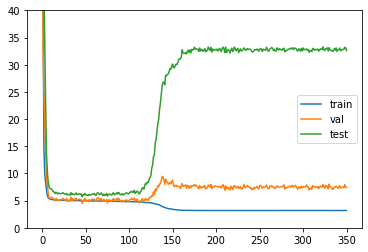

Train_epoch:360    MAE:3.1820059978306414  Pure MAE:3.1820059978306414
val_epoch:360    MAE_val:7.0025588408448645
Test_epoch:360    MAE_test:32.394909870930206


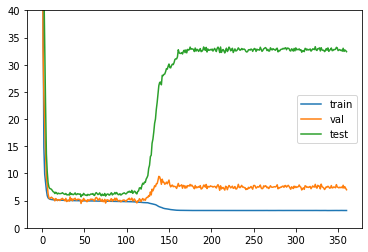

Train_epoch:370    MAE:3.183510284074212  Pure MAE:3.183510284074212
val_epoch:370    MAE_val:7.22023772476311
Test_epoch:370    MAE_test:32.636913623565285


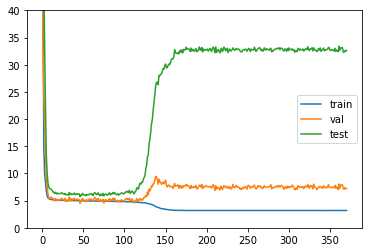

Train_epoch:380    MAE:3.1791162884162545  Pure MAE:3.1791162884162545
val_epoch:380    MAE_val:7.541831102586331
Test_epoch:380    MAE_test:33.09065621327131


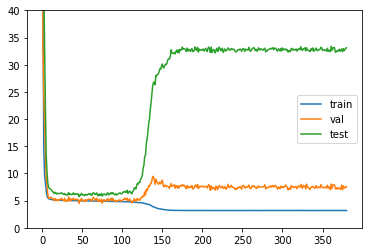

Train_epoch:390    MAE:3.1834835107846073  Pure MAE:3.1834835107846073
val_epoch:390    MAE_val:7.947996842233758
Test_epoch:390    MAE_test:33.35342796643575


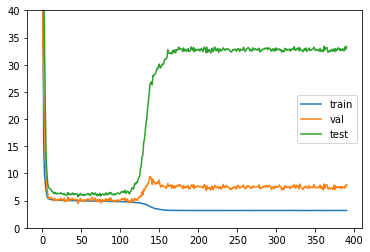

Train_epoch:400    MAE:3.1864410427582968  Pure MAE:3.1864410427582968
val_epoch:400    MAE_val:7.197884627750942
Test_epoch:400    MAE_test:32.46681813093332


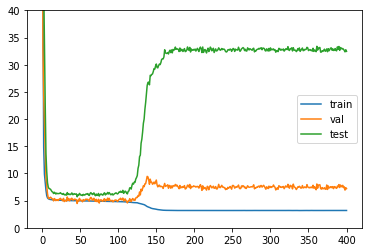

Train_epoch:410    MAE:3.1785715883958123  Pure MAE:3.1785715883958123
val_epoch:410    MAE_val:7.268398406810331
Test_epoch:410    MAE_test:32.557639042536415


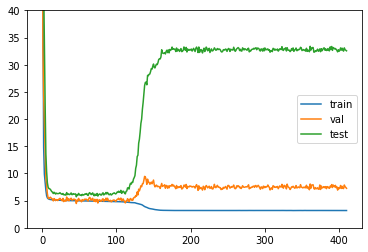

Train_epoch:420    MAE:3.184247523849705  Pure MAE:3.184247523849705
val_epoch:420    MAE_val:7.463574506286392
Test_epoch:420    MAE_test:32.838186539136444


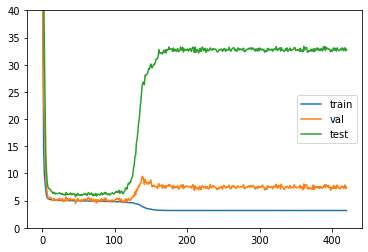

Train_epoch:430    MAE:3.180684293603217  Pure MAE:3.180684293603217
val_epoch:430    MAE_val:7.281212250989182
Test_epoch:430    MAE_test:32.66300455117837


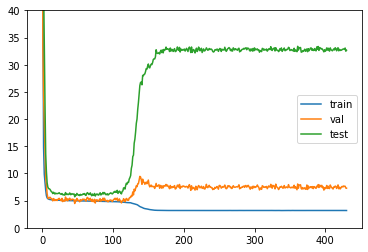

Train_epoch:440    MAE:3.177935273487068  Pure MAE:3.177935273487068
val_epoch:440    MAE_val:7.16484634858325
Test_epoch:440    MAE_test:32.49128517126426


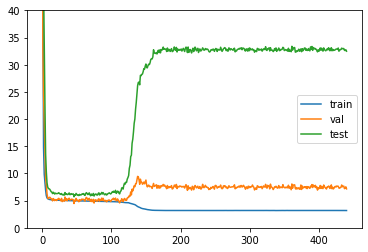

KeyboardInterrupt: 

In [2]:
s_or_d = "s"
unrelated_feature_number = 0
feature_number = 3

train_log = np.array([])
val_log = np.array([])
test_log = np.array([])


batchsize = 32
lambda_l1 = 0.005  # 正则化系数
lambda_selection = 0

criterion = nn.L1Loss()
criterion = criterion.cuda()

model = MLP(feature_number).cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_dataset = Dataset("../data/features_rand_train_90_130.npy", s_or_d, 0, unrelated_feature_number)
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

val_dataset = Dataset("../data/features_rand_validate_130_140.npy", s_or_d, 1, unrelated_feature_number)
val_loader = DataLoader(val_dataset, batch_size=batchsize, shuffle=True,drop_last=True)

test_dataset = Dataset("../data/features_rand_test.npy", s_or_d, 2, unrelated_feature_number)
test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=True,drop_last=True)


for epoch in range(501):
    
    # print(f"Learning Rate (Single LR): {optimizer.param_groups[0]['lr']}")
    
    model.train()
    # print(epoch)
    loss_total = 0
    step = 0
    loss_pure = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()

        # print(data.shape)

        # target = (target - min) / (max - min)

        output = model(data)

        loss = criterion(output, target)
        
        loss_pure = loss_pure + loss.item()
        
#         l1_regularization = torch.tensor(0.0).cuda()
#         l1_selection = torch.tensor(0.0).cuda()
        
#         for param in model.seq.parameters():
#             l1_regularization += torch.norm(param, p=1)
        
        # for param in model.OneToOneLayer.parameters():
        #     l1_selection += torch.norm(param, p=1)
        
        # loss = loss + l1_regularization * lambda_l1 + l1_selection * lambda_selection

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total = loss_total + loss.item()
        step = step + 1
    
    # scheduler.step()
    
    # writer["train"].add_scalar('FS', loss_total/step, epoch)  
    train_log = np.append(train_log, loss_total/step)
    
    # tmp = '../pth/tmp_%d_%.2f.pth' % (epoch, loss_total/step)
    
    if epoch % 10 == 0:
        # torch.save(model, tmp)
        print("Train_epoch:" + str(epoch) + "    MAE:" + str(loss_total/step) + "  Pure MAE:" + str(loss_pure/step)) 
    # print("train finish")
    loss_test = 0
    loss_val = 0
    step_val = 0
    step_test = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)

            loss = criterion(output, target)

            loss_val += loss.item()
            step_val += 1
        
        
        for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.cuda(), target.cuda()
            output = model(data)

            # inv_norm
            # output = output * (max - min) + min

            loss = criterion(output, target)

            loss_test += loss.item()
            step_test += 1
            

        loss_mean = loss_test / step_test
        loss_val_mean = loss_val / step_val
        
        # writer["test"].add_scalar('FS', loss_mean, epoch) 
        test_log = np.append(test_log, loss_mean)
        val_log = np.append(val_log, loss_val_mean)
        
        if epoch % 10 == 0 and epoch != 0:
            print("val_epoch:" + str(epoch) + "    MAE_val:" + str(loss_val_mean))
            print("Test_epoch:" + str(epoch) + "    MAE_test:" + str(loss_mean))
            # tmp_epoch = np.arange(epoch+1)
            # print(tmp_epoch)
            plt.plot(train_log)
            plt.plot(val_log)
            plt.plot(test_log)
            
            plt.legend(["train","val","test"])
            plt.ylim(0,40)
            plt.show()